In [89]:
# importing necessary libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns
from prophet.plot import plot_plotly
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.graph_objects as go
import csv
import shutil
from prophet.serialize import model_to_json, model_from_json
from prophet.plot import plot_plotly
import requests
from geopy.geocoders import Nominatim
import datetime as dt
import pandas as pd  
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math


from prophet.plot import add_changepoints_to_plot
from prophet import *
# from 


In [19]:
def get_perf(m , train, horizon = 365 ):
  """
  Parameters
  ----------
  m: model
  train: full train df on which model if fitted

  Returns
  -------
  Tuple(mae , rmse)
  """
  
  fcst_df = m.make_future_dataframe(periods = horizon)
  fcst = m.predict(fcst_df)
    
  perf_df = fcst[ : -horizon]
  perf_df['y'] = train['y']

  score_mae = mean_absolute_error(perf_df['y'] , perf_df['yhat'])
  score_rmse = math.sqrt(mean_squared_error(perf_df['y'] , perf_df['yhat']))
  mape = 100 * np.mean(np.abs((perf_df['y'] - perf_df['yhat']) / perf_df['y']))

  # print(score_mae)
  # print(mape)
  print(score_rmse)
  return (fcst , score_rmse)
def line_plot_plotly(m, forecast):
    past = m.history['y']
    future = forecast['yhat']
    # future = future.apply(conv)
    timeline = forecast['ds']
    
    
    # print(past)
    # print(past1.iloc[-1])

    # forecast=forecast.loc[forecast['ds']>past1.iloc[-1]]

    trace1 = go.Scatter(
        x=timeline,
        y=past,
        mode='lines',
        name='Actual',
        line=dict(color='#777777')
    )
    trace2 = go.Scatter(
        x=timeline,
        y=future,
        mode='lines',
        name='Predicted',
        line=dict(color='#FF7F50')
    )

    data = [trace1, trace2]

    layout = go.Layout(
        title='Actual vs. Predicted Values',
        xaxis=dict(title='Date', rangeslider=dict(visible=True),
                   rangeselector=dict(
                buttons=list([
              dict(step="all"),      
              dict(count=3, label="3y", step="year", stepmode="backward"),
              dict(count=2, label="2y", step="year", stepmode="backward"),
              dict(count=1, label="1y", step="year", stepmode="backward")
              
                ]),
            )),
        yaxis=dict(title='Value'),
        showlegend=True
    )

    fig = go.Figure(data=data, layout=layout)

    return fig
def train_model():
  
  df = pd.read_csv('london_merged.csv') #latest data

  df['timestamp'] =  pd.to_datetime(df['timestamp'])
  col = 'cnt'

  df = df[[col , 'timestamp']]
  df['timestamp'] =  pd.to_datetime(df['timestamp'])
  #-------

  df = df.set_index('timestamp')
  df = df.resample('d').max()
  df=df.dropna(axis=0)
  df = df.reset_index()
  #---------

  df['ds'] = df['timestamp']
  df = df.rename({col : 'y'}, axis = 'columns')


  m1 = Prophet()
  m = Prophet(
              seasonality_mode='multiplicative',
              weekly_seasonality=True,
              daily_seasonality=False
              )
  m.add_seasonality(
                    name='yearly',
                    period=365,
                    fourier_order=20
                    )

  # m.add_seasonality(name='yearly', period=365, fourier_order=20)

  m.fit(df)
  m1.fit(df)

  future = m.make_future_dataframe(periods=365)

  future['yearly'] = future['ds'].apply(lambda x: x.year - 1)
  rmse=get_perf(m1 , df)
  print('rmse',rmse)
  forecast = m.predict(future)
  fig=plot_plotly(m,forecast)
  fig.show()
  # plot_plotly(m,forecast) 
  # with open('model.json', 'w') as fout:
  #   fout.write(model_to_json(m))  # Save model
  # print("model saved")
  # forecast.to_csv("forecast.csv", index=False)
  # print("prediction file saved")


train_model()


INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpukxc89_7/s4g6ioew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpukxc89_7/aa6ut8nx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85203', 'data', 'file=/tmp/tmpukxc89_7/s4g6ioew.json', 'init=/tmp/tmpukxc89_7/aa6ut8nx.json', 'output', 'file=/tmp/tmpukxc89_7/prophet_modelk6pns6ti/prophet_model-20230306092807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:28:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:28:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpukxc89_7

569.6053328362559
rmse (             ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    2015-01-04  3447.938340   119.088453  1532.592228  3447.938340   
1    2015-01-05  3447.929937  1682.228871  3199.228366  3447.929937   
2    2015-01-06  3447.921535  2095.230128  3586.025587  3447.921535   
3    2015-01-07  3447.913132  2219.436487  3634.076351  3447.913132   
4    2015-01-08  3447.904730  2261.679929  3648.674407  3447.904730   
...         ...          ...          ...          ...          ...   
1090 2017-12-30  3785.041757   113.149831  1599.964715  3763.000236   
1091 2017-12-31  3785.466601   222.129345  1682.704844  3763.354000   
1092 2018-01-01  3785.891444  1822.387482  3257.500472  3763.702601   
1093 2018-01-02  3786.316287  2191.475220  3649.025454  3764.051201   
1094 2018-01-03  3786.741130  2245.540820  3705.664316  3764.399801   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     3447.938340    -2608.824364         

DEBUG:cmdstanpy:input tempfile: /tmp/tmpukxc89_7/659wpou2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpukxc89_7/45yokgnz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80828', 'data', 'file=/tmp/tmpukxc89_7/659wpou2.json', 'init=/tmp/tmpukxc89_7/45yokgnz.json', 'output', 'file=/tmp/tmpukxc89_7/prophet_modelu9xlz1ye/prophet_model-20230306112920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:29:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:29:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


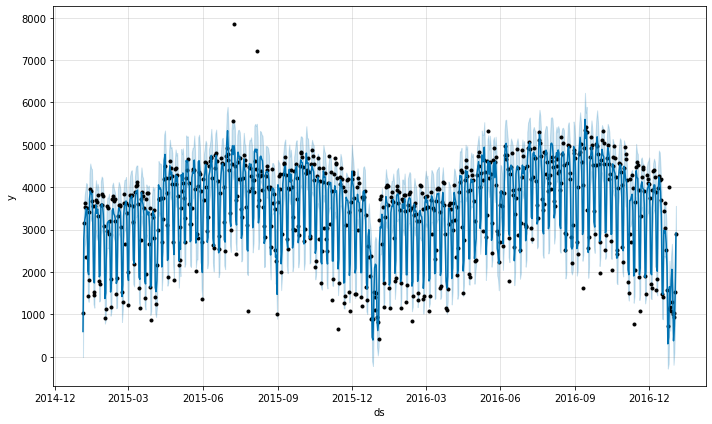

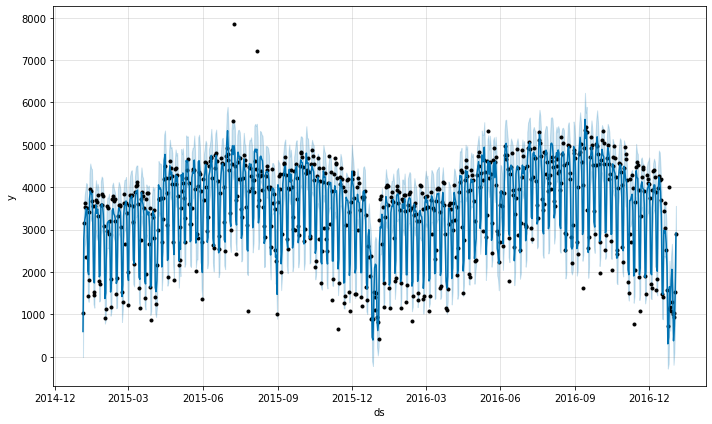

In [72]:
# Importing the necessary libraries
def line_plot_plotly(m, forecast):
    past = m.history['y']
    future = forecast['yhat']
    # future = future.apply(conv)
    timeline = forecast['ds']
    
    
    # print(past)
    # print(past1.iloc[-1])

    # forecast=forecast.loc[forecast['ds']>past1.iloc[-1]]

    trace1 = go.Scatter(
        x=timeline,
        y=past,
        mode='markers',
        name='Actual',
        line=dict(color='#777777')
    )
    trace2 = go.Scatter(
        x=timeline,
        y=future,
        mode='markers',
        name='Predicted',
        line=dict(color='#FF7F50')
    )

    data = [trace1, trace2]

    layout = go.Layout(
        title='Actual vs. Predicted Values',
        xaxis=dict(title='Date', rangeslider=dict(visible=True),
                   rangeselector=dict(
                buttons=list([
              dict(step="all"),      
              dict(count=3, label="3y", step="year", stepmode="backward"),
              dict(count=2, label="2y", step="year", stepmode="backward"),
              dict(count=1, label="1y", step="year", stepmode="backward")
              
                ]),
            )),
        yaxis=dict(title='Value'),
        showlegend=True
    )

    fig = go.Figure(data=data, layout=layout)

    return fig

# Loading the dataset
df = pd.read_csv('london_merged.csv')

# Creating the training and testing datasets
df['timestamp'] =  pd.to_datetime(df['timestamp'])
col = 'cnt'

# df = df[[col , 'timestamp']]
df['timestamp'] =  pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df = df.resample('d').max()
df=df.dropna(axis=0)
df = df.reset_index()
df.drop_duplicates(inplace=True)
df['ds'] = df['timestamp']
# df['y'] = df['t1']
df = df.rename({col : 'y'}, axis = 'columns')

# Convert 'season' column to one-hot-encoded columns
seasons = pd.get_dummies(df['season'], prefix='season')
df = pd.concat([df, seasons], axis=1)

# Drop the original 'season' column
df.drop('season', axis=1, inplace=True)
df

# Creating the Prophet model with seasonal regressors
model = Prophet(seasonality_mode='multiplicative', 
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                changepoint_prior_scale=0.05)

# # Adding the seasonal regressors based on the categorical features
for col in seasons.columns:
    if col != 'season_1':
        model.add_seasonality(name=col, period=365/4, fourier_order=5, condition_name=col)
model.add_seasonality(name='holiday', period=365, fourier_order=10, condition_name='is_holiday')
model.add_seasonality(name='weekend', period=7, fourier_order=10, condition_name='is_weekend')
# model.add_seasonality(name='weather', period=365/12, fourier_order=5, condition_name='weather_code')

# # Adding the continuous regressors
model.add_regressor('t1')
model.add_regressor('t2')

# # print(df.count())

# # print(df.index.duplicated().sum())
# # print(df.columns.duplicated().sum())


# # Fitting the model to the training data
model.fit(df)

# # Making predictions on the testing data
future = model.make_future_dataframe(periods=365, freq='D')
future['t1'] = df['t1']
future['t2'] = df['t2']
future['is_holiday'] = df['is_holiday']
future['is_weekend'] = df['is_weekend']
future['season_0.0'] = df['season_0.0']
future['season_1.0'] = df['season_1.0']
future['season_2.0'] = df['season_2.0']
future['season_3.0'] = df['season_3.0']
future=future.dropna(axis=0)
forecast = model.predict(future)
# fig=line_plot_plotly(model, forecast)
# fig.show()
# Evaluating the model's performance
# mae = abs(forecast['yhat'][-len(df):] - df['cnt']).mean()
# rmse = ((forecast['yhat'][-len(df):] - df['cnt']) ** 2).mean() ** 0.5
# r2 = 1 - (sum((df['cnt'] - forecast['yhat'][-len(df):]) ** 2) / 
#           ((len(df) - 1) * df['cnt'].var()))

# print('MAE:', mae)
# print('RMSE:', rmse)
# print('R-squared:', r2)

# Plotting the predicted values against the actual values
model.plot(forecast)

# # Visualizing the trend and seasonality components of the predicted values
# model.plot_components(forecast)


In [71]:
def get_perf(m , train, horizon = 365 ):
  """
  Parameters
  ----------
  m: model
  train: full train df on which model if fitted

  Returns
  -------
  Tuple(mae , rmse)
  """
  
  future = model.make_future_dataframe(periods=365, freq='D')
  future['t1'] = df['t1']
  future['t2'] = df['t2']
  future['is_holiday'] = df['is_holiday']
  future['is_weekend'] = df['is_weekend']
  future['season_0.0'] = df['season_0.0']
  future['season_1.0'] = df['season_1.0']
  future['season_2.0'] = df['season_2.0']
  future['season_3.0'] = df['season_3.0']
  future=future.dropna(axis=0)
  fcst = m.predict(future)
    
  perf_df = fcst[ : -horizon]
  perf_df['y'] = train['y']

  score_mae = mean_absolute_error(perf_df['y'] , perf_df['yhat'])
  score_rmse = math.sqrt(mean_squared_error(perf_df['y'] , perf_df['yhat']))
  mape = 100 * np.mean(np.abs((perf_df['y'] - perf_df['yhat']) / perf_df['y']))

  # print(score_mae)
  # print(mape)
  print(score_rmse)
  return (fcst , score_rmse)
get_perf(model , df, horizon = 365 )

469.3976441854684


<ipython-input-71-0c20549f4dfc>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(            ds        trend   yhat_lower   yhat_upper  trend_lower  \
 0   2015-01-04  3703.584840    40.436293  1201.201794  3703.584840   
 1   2015-01-05  3703.777131  2185.117141  3354.719749  3703.777131   
 2   2015-01-06  3703.969422  2585.198752  3808.167325  3703.969422   
 3   2015-01-07  3704.161713  2705.446078  3900.187204  3704.161713   
 4   2015-01-08  3704.354005  2899.032924  4094.114745  3704.354005   
 ..         ...          ...          ...          ...          ...   
 725 2016-12-30  4109.269491   952.261487  2162.128903  4109.269491   
 726 2016-12-31  4110.989756  -209.243339  1011.046899  4110.989756   
 727 2017-01-01  4112.710021   114.417735  1294.175397  4112.710021   
 728 2017-01-02  4114.430286   893.281325  2086.191573  4114.430286   
 729 2017-01-03  4116.150551  2386.077367  3509.414740  4116.150551   
 
      trend_upper  extra_regressors_multiplicative  \
 0    3703.584840                        -0.194634   
 1    3703.777131                     

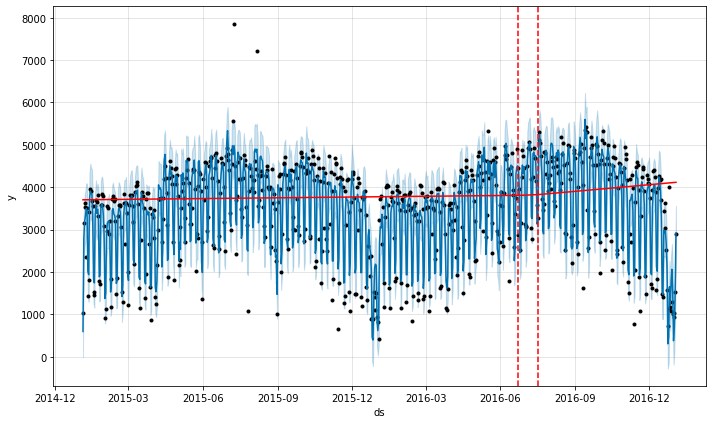

In [91]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [78]:
y_pred = np.array(forecast['yhat'])
y_true = np.array(df['y'])

# Calculating the RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("RMSE:", rmse)

print(len(y_pred), len(y_true))

RMSE: 468.76139890605515
730 730


In [94]:
# from prophet.diagnostics import cross_validation
# from prophet.diagnostics import performance_metrics

# # Cross-validation
# df_cv = cross_validation(model, initial='30 days', period='15 days', horizon = '365 days')

# # Filter the cross-validation dataframe to include only rows where y is within yhat_lower and yhat_upper
# df_cv_filtered = df_cv[(df_cv['y'] >= df_cv['yhat_lower']) & (df_cv['y'] <= df_cv['yhat_upper'])]

# # Calculate performance metrics, including RMSE
# df_metrics = performance_metrics(df_cv_filtered)
# rmse, rem = divmod(df_metrics['rmse'].values[0], 100)
# print(rmse)